In [1]:
from skimage import filters,data,color,measure,exposure
from matplotlib import pyplot as plt
import numpy as np

def loadImages(fileList):
    imageList = []
    for img in fileList:
        imageList.append(data.imread(img))
    return imageList

In [2]:
def findEdges(image):
    intensityP = 1
    intensityK = 20
    pp,pk = np.percentile(image,(intensityP,intensityK));
    image = exposure.rescale_intensity(image,in_range=(pp,pk))
    image = color.rgb2hsv(image)
    blackWhite = np.zeros([len(image),len(image[0])])
    for i in range(len(image)):
        for j in range(len(image[i])):
            blackWhite[i][j] =1- image[i][j][2]
            image[i][j] = [0,0,0]
    contours = measure.find_contours(blackWhite,0.3)
    return  image,contours

In [17]:
def drawPlotsBlack(imageList):
    fig = plt.figure(facecolor="black")
    i = 0
    for img in imageList:
        plt.subplot(231+i)
        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
        image, contours = findEdges(img)
        for n,contours in enumerate(contours):
            plt.plot(contours[:,1],contours[:,0],linewidth=0.8,color="w")
        plt.imshow(image)
        i +=1
    plt.tight_layout()
    plt.show()
    fig.savefig("samoloty.pdf",facecolor="black")
    plt.close()

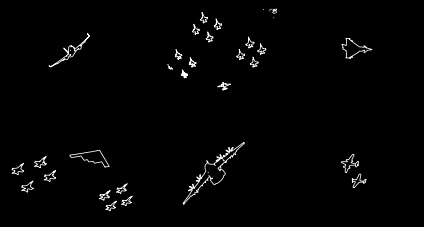

In [18]:
if __name__ == '__main__':
    fileList = ["./images/samolot02.jpg","./images/samolot04.jpg","./images/samolot08.jpg","./images/samolot16.jpg","./images/samolot11.jpg","./images/samolot01.jpg"];
    imageList = loadImages(fileList)
    drawPlotsBlack(imageList)